Testing df methods

In [1]:
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
from NUDT7_ratios import read_grouped_csv
#data_dir = "/hdlocal/enelson/mass_spec_ratio/NUDT7_Data"
data_dir = "/home/nelse003/PycharmProjects/mass_spec_ratio/NUDT7_Data"

df_dict = {}
for csv in os.listdir(data_dir):
    csv = os.path.join(data_dir, csv)
    df_dict.update(read_grouped_csv(csv))
    

/home/nelse003/PycharmProjects/mass_spec_ratio/NUDT7_ratios.py:36: FutureWarning: split() requires a non-empty pattern match.
  split_data = header_re.split(data)


In [4]:
print(df_dict.keys())

dict_keys(['190302 : "+ESI Scan (rt: 7.215-7.992 min, 48 scans) Frag=250.0V blank01.d  Deconvoluted (Isotope Width=0.0)"\n', '190302 : "+ESI Scan (rt: 7.201-7.995 min, 49 scans) Frag=250.0V blank02.d  Deconvoluted (Isotope Width=0.0)"\n', '190302 : "+ESI Scan (rt: 7.210-7.988 min, 48 scans) Frag=250.0V blank03.d  Deconvoluted (Isotope Width=0.0)"\n', '190302 : "+ESI Scan (rt: 7.207-8.001 min, 49 scans) Frag=250.0V blank04.d  Deconvoluted (Isotope Width=0.0)"\n', '190302 : "+ESI Scan (rt: 7.204-7.998 min, 49 scans) Frag=250.0V blank05.d  Deconvoluted (Isotope Width=0.0)"\n', '190302 : "+ESI Scan (rt: 7.208-7.986 min, 48 scans) Frag=250.0V blank06.d  Deconvoluted (Isotope Width=0.0)"\n', '190302 : "+ESI Scan (rt: 7.204-7.997 min, 49 scans) Frag=250.0V blank07.d  Deconvoluted (Isotope Width=0.0)"\n', '190302 : "+ESI Scan (rt: 7.199-7.993 min, 49 scans) Frag=250.0V blank08.d  Deconvoluted (Isotope Width=0.0)"\n', '190302 : "+ESI Scan (rt: 7.206-8.000 min, 49 scans) Frag=250.0V blank09.d  D

In [5]:
sample_key = '190301 : "+ESI Scan (rt: 7.203-7.997 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074435_F5a.d  Deconvoluted (Isotope Width=0.0)"\n'

print(df_dict[sample_key])

       Point  X(Daltons)     Y(Counts)
0          0     15000.0  5.641444e-07
1          1     15001.0  3.845424e-05
2          2     15002.0  1.062780e-04
3          3     15003.0  2.344615e-04
4          4     15004.0  4.305320e-04
5          5     15005.0  6.650165e-04
6          6     15006.0  8.809295e-04
7          7     15007.0  9.815170e-04
8          8     15008.0  8.738276e-04
9          9     15009.0  6.013412e-04
10        10     15010.0  3.277151e-04
11        11     15011.0  1.547168e-04
12        12     15012.0  6.985284e-05
13        13     15013.0  3.141039e-05
14        14     15014.0  1.449706e-05
15        15     15015.0  8.092951e-06
16        16     15016.0  8.110250e-06
17        17     15017.0  1.611625e-05
18        18     15018.0  4.261735e-05
19        19     15019.0  1.139812e-04
20        20     15020.0  2.716987e-04
21        21     15021.0  5.335366e-04
22        22     15022.0  8.135565e-04
23        23     15023.0  9.408923e-04
24        24     15024.0 

In [6]:
sample_df = df_dict[sample_key]

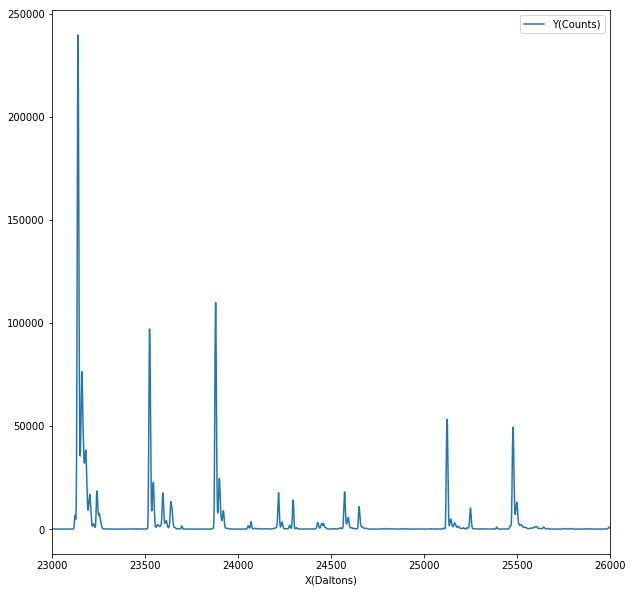

In [7]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',xlim=(23000,26000))

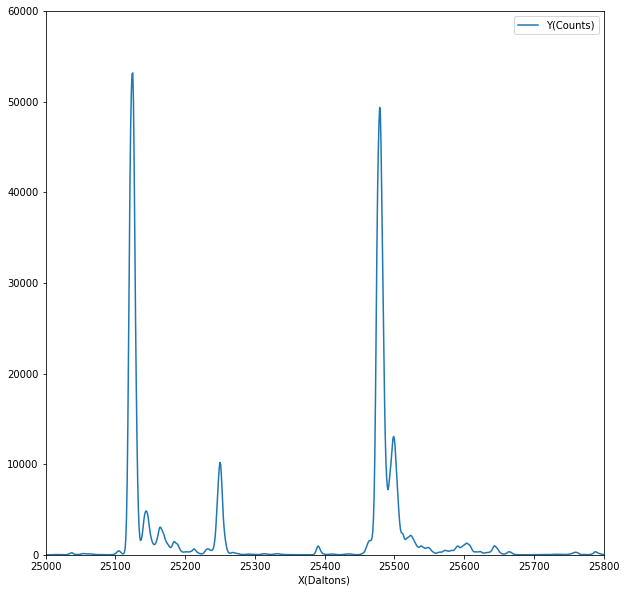

In [8]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',xlim=(25000,25800),ylim=(0,60000))

In [9]:
unlabelled_peak_df = sample_df[(sample_df['X(Daltons)'] >= 25100) & (sample_df['X(Daltons)'] <= 25300)]

In [10]:
unlabelled_peak_df['Y(Counts)'].sum()

774803.15303421021

In [11]:
labelled_peak_df = sample_df[(sample_df['X(Daltons)'] >= 25454) & (sample_df['X(Daltons)'] <= 25654)]

In [12]:
labelled_peak_df['Y(Counts)'].sum()

846106.78260803223

In [13]:
labelled_peak_df['Y(Counts)'].sum()/unlabelled_peak_df['Y(Counts)'].sum()

1.092028058087515

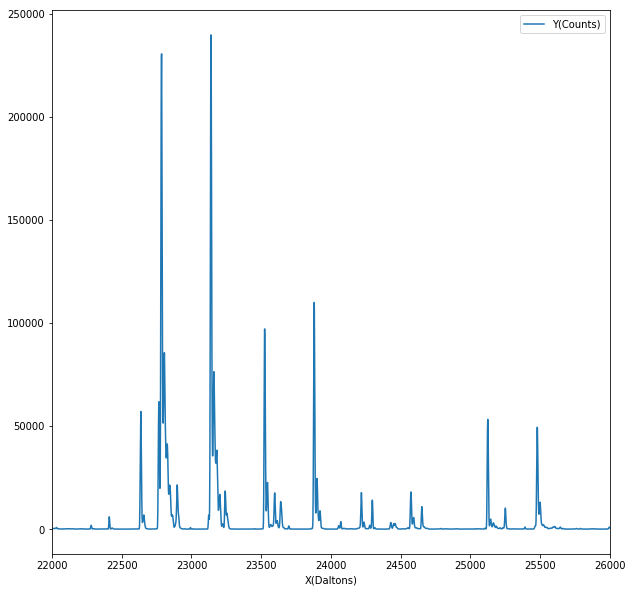

In [18]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(22000,26000))

Expected peaks are to seperated by 354. Lokking for pairs

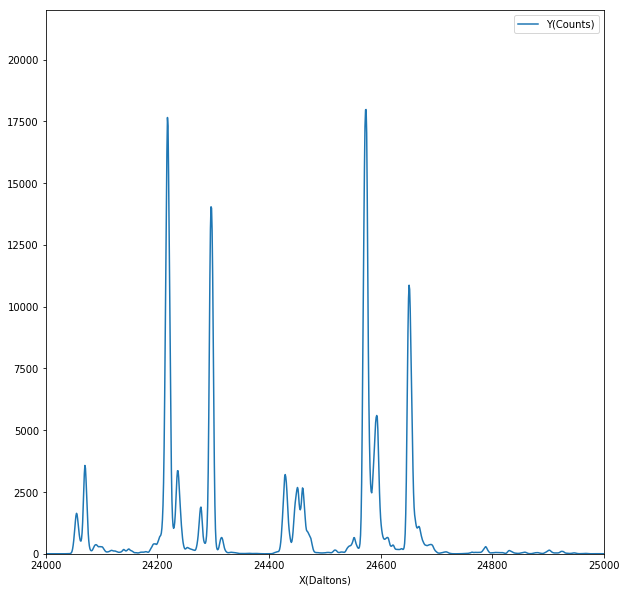

In [21]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(24000,25000),ylim=(0,22000))

In [22]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 24200) & (sample_df['X(Daltons)'] <= 24400)]

In [30]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point          9218.000000
X(Daltons)    24218.000000
Y(Counts)     17657.451172
Name: 9218, dtype: float64

Therefore the maximum should be at 24,572 for that to be a peak

In [32]:
test_label_df = sample_df[(sample_df['X(Daltons)'] >= 24500) & (sample_df['X(Daltons)'] <= 24700)]

In [33]:
test_label_df.loc[test_label_df['Y(Counts)'].idxmax()]

Point          9574.000000
X(Daltons)    24574.000000
Y(Counts)     17981.341797
Name: 9574, dtype: float64

In [34]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 24000) & (sample_df['X(Daltons)'] <= 24100)]

In [35]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point          9070.000000
X(Daltons)    24070.000000
Y(Counts)      3575.023193
Name: 9070, dtype: float64

In [36]:
test_label_df = sample_df[(sample_df['X(Daltons)'] >= 24400) & (sample_df['X(Daltons)'] <= 24500)]

In [37]:
test_label_df.loc[test_label_df['Y(Counts)'].idxmax()]

Point          9429.000000
X(Daltons)    24429.000000
Y(Counts)      3206.845947
Name: 9429, dtype: float64

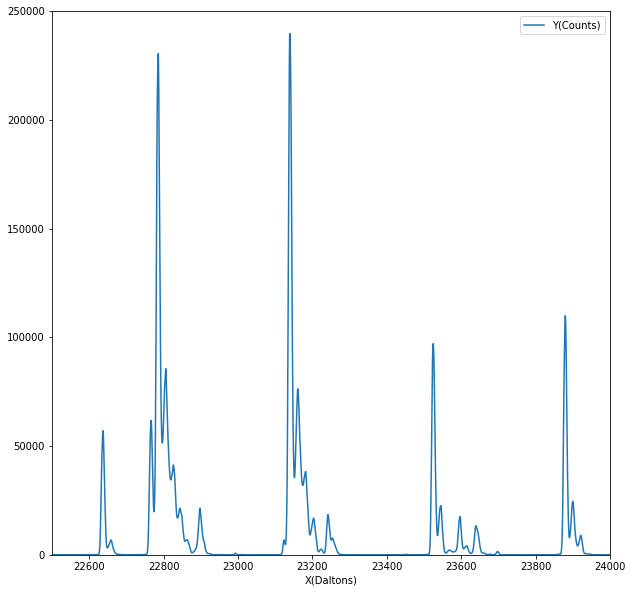

In [40]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(22500,24000),ylim=(0,250000))

Looks like two sets of peaks

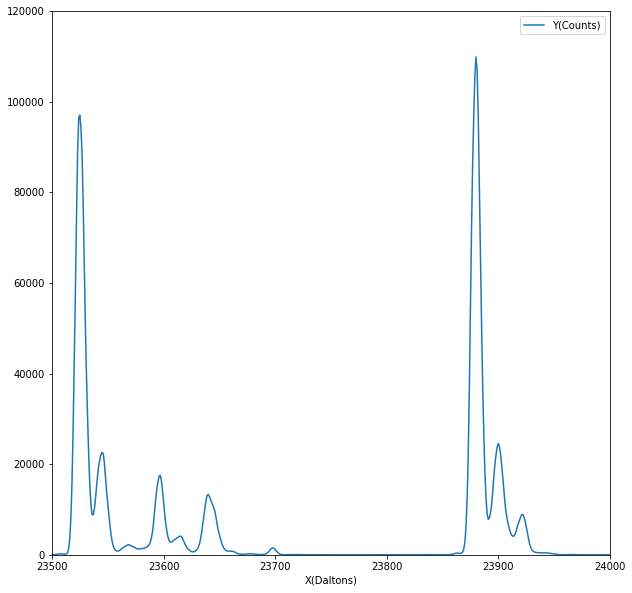

In [41]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(23500,24000),ylim=(0,120000))

In [42]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 23500) & (sample_df['X(Daltons)'] <= 23700)]

In [43]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point          8525.000000
X(Daltons)    23525.000000
Y(Counts)     97079.601562
Name: 8525, dtype: float64

In [44]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 23850) & (sample_df['X(Daltons)'] <= 23950)]

In [45]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point           8880.000000
X(Daltons)     23880.000000
Y(Counts)     109901.679688
Name: 8880, dtype: float64

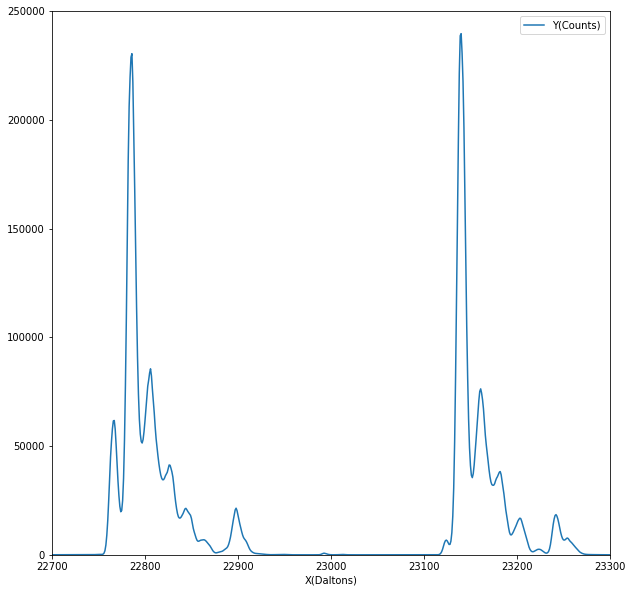

In [48]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(22700,23300),ylim=(0,250000))

In [49]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 22750) & (sample_df['X(Daltons)'] <= 22900)]

In [50]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point           7786.000000
X(Daltons)     22786.000000
Y(Counts)     230468.328125
Name: 7786, dtype: float64

In [51]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 23100) & (sample_df['X(Daltons)'] <= 23300)]

In [52]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point           8140.000000
X(Daltons)     23140.000000
Y(Counts)     239670.484375
Name: 8140, dtype: float64

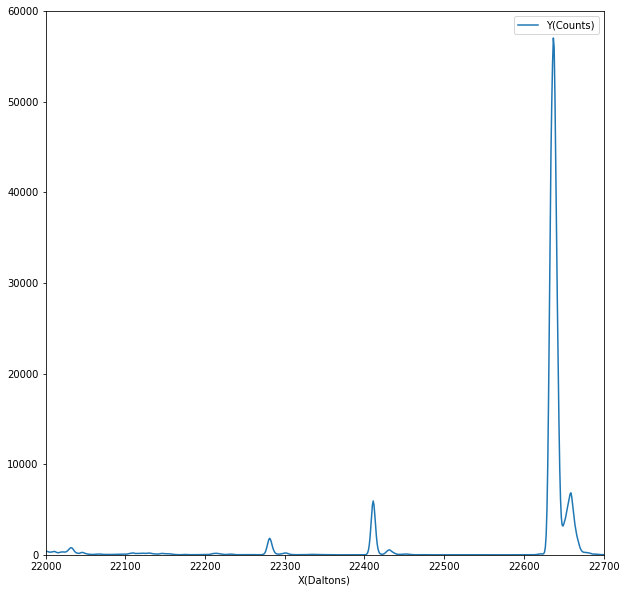

In [61]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(22000,22700),ylim=(0,60000))

In [62]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 22600) & (sample_df['X(Daltons)'] <= 22700)]

In [63]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point          7637.00000
X(Daltons)    22637.00000
Y(Counts)     57046.96875
Name: 7637, dtype: float64

Therefore we have:

| Unlabelled | Labelled |
| --- | --- |
| 25125 | 25479 |
| 24218 | 24574 |
| 23525 | 23879 |
| 22786 | 23140 | 

Peak at 22637 doesnt match next peak down. Could be two weak pairs? Explain 8/9 strongest peaks. Need to look at the continuty of ratios between the sets, and the difference using max peak, and area within defined region from